In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Train',
                                                target_size=(200,200),
                                                batch_size= 128,
                                                class_mode='binary',shuffle=False)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Val',
                                           target_size = (200,200),
                                           batch_size = 128,
                                           class_mode ='binary',shuffle=False)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
test_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
from tensorflow.keras.applications import vgg16
vgg16_model=vgg16.VGG16(include_top=False, input_shape=(200, 200, 3))
vgg16_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [ ]:
# Freeze all the layers
for layer in vgg16_model.layers[:]:
    layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
# Create the the model
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 1024)              18875392  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 33,591,105
Trainable params: 18,876,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
batch_size=128
results=model.fit(train_set, epochs=10,validation_data=test_set,
                  steps_per_epoch=len(train_set),validation_steps=len(test_set),
                  callbacks=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
                  )

Epoch 1/10
2/2 [==============================] - 13s 8s/step - loss: 0.3165 - accuracy: 0.8616 - val_loss: 0.2007 - val_accuracy: 0.9667
Epoch 2/10
2/2 [==============================] - 10s 7s/step - loss: 0.1635 - accuracy: 0.9866 - val_loss: 0.1688 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 10s 7s/step - loss: 0.1392 - accuracy: 0.9955 - val_loss: 0.1642 - val_accuracy: 0.9667
Epoch 4/10
2/2 [==============================] - 11s 5s/step - loss: 0.1563 - accuracy: 0.9866 - val_loss: 0.1671 - val_accuracy: 0.9500
Epoch 5/10
2/2 [==============================] - 9s 5s/step - loss: 0.1433 - accuracy: 0.9821 - val_loss: 0.1570 - val_accuracy: 0.9500
Epoch 6/10
2/2 [==============================] - 9s 5s/step - loss: 0.1196 - accuracy: 0.9866 - val_loss: 0.1337 - val_accuracy: 0.9500
Epoch 7/10
2/2 [==============================] - 9s 7s/step - loss: 0.1051 - accuracy: 0.9821 - val_loss: 0.1019 - val_accuracy: 0.9667
Epoch 8/10
2/2 [=====================

In [ ]:
model.evaluate(test_set)


1/1 [==============================] - 2s 2s/step - loss: 0.0597 - accuracy: 1.0000


[0.059728678315877914, 1.0]

In [ ]:
model.evaluate(train_set)

2/2 [==============================] - 7s 2s/step - loss: 0.0389 - accuracy: 1.0000


[0.038941092789173126, 1.0]

In [ ]:
model.save('/content/drive/MyDrive/SavedModels/vgg16_keras_Covid.h5')

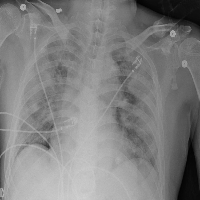

In [ ]:
from keras.preprocessing import image
#from keras.applications.vgg16 import preprocess_input, decode_predictions,VGG16
img1 =tf.keras.utils.load_img('/content/drive/MyDrive/CovidDataset/Val/Covid/16654_4_1.jpg',target_size =(200,200))
img1


In [ ]:
img =tf.keras.preprocessing.image.img_to_array(img1)
img.shape
img = img/255
img =np.expand_dims(img, axis =0)
img.shape

(1, 200, 200, 3)

In [ ]:
y_pred_img = model.predict(img)
if y_pred_img>= 0.5:
    prediction = 'normal'
else:
    prediction = 'covid'
print(prediction)

1/1 [==============================] - 0s 20ms/step
covid


In [ ]:
y_pred=model.predict(test_set)
y_pred[0:5]

1/1 [==============================] - 2s 2s/step


array([[0.03259401],
       [0.01897759],
       [0.02664232],
       [0.1851414 ],
       [0.00776616]], dtype=float32)

In [ ]:
y_pred1=(y_pred>=0.5).astype(int)
y_pred1[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
y_pred1.shape

(60, 1)

In [ ]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(test_set.labels,y_pred1))

accuracy_score(test_set.labels,y_pred1)*100

[[30  0]
 [ 0 30]]


100.0

In [ ]:
import pandas as pd
df =pd.DataFrame({'filename':test_set.filenames,'y':test_set.classes,'y_pred1':y_pred1[:,0]})
df





,filename,y,y_pred1
0,Covid/16654_1_1.png,0,0
1,Covid/16654_2_1.jpg,0,0
2,Covid/16654_4_1.jpg,0,0
3,Covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png,0,0
4,Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg,0,0
5,Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg,0,0
6,Covid/4-x-day1.jpg,0,0
7,Covid/41591_2020_819_Fig1_HTML.webp-day10.png,0,0
8,Covid/41591_2020_819_Fig1_HTML.webp-day5.png,0,0
9,Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg,0,0


In [ ]:
misclassification=df[df['y']!=df['y_pred1']]
misclassification

,filename,y,y_pred1


In [ ]:
misclassification['y'].count()

0